### Критерии проверки нормальности

В этом ноутбуке мы разберемся, каким образом можно проверять выборку на нормальность и соответствие другим распределениям.

Рассмотрим применение следующих критериев:

1. Критерий Колмогорова-Смирнова (kstest)
2. Критерий Андерсона-Дарлинга (anderson)
3. Критерий Шапиро-Уилка (shapiro)
4. Критерий хи-квадрат (chisquare)

Дополнительно рассмотрим эвристики работы с данными, которые помогут проверить ту или иную гипотезу.

### 0. Необходимые импорты и чтение данных

In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Рассмотрим датасет http://archive.ics.uci.edu/ml/datasets/Wine - датасет химического анализа вин.

In [4]:
data_wine = pd.read_csv('./wine.data', header=None, names=[
    'Class',
    'Alcohol',
    'Malic acid',
    'Ash',
    'Alcalinity of ash',
    'Magnesium',
    'Total phenols',
    'Flavanoids',
    'Nonflavanoid phenols',
    'Proanthocyanins',
    'Color intensity',
    'Hue',
    'OD280/OD315 of diluted wines',
    'Proline'
])

In [5]:
data_wine.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
data_wine.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


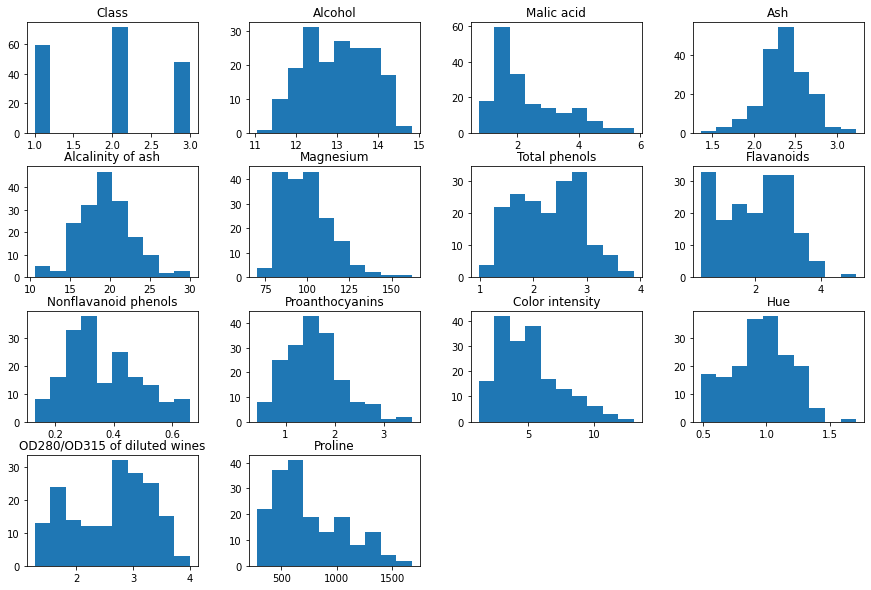

In [7]:
_ = data_wine.hist(grid=False, figsize=(15, 10))

Какой из графиков больше похож на график нормального распределения?

Рассмотрим два столбца: Alcalinity of Ash и Ash.

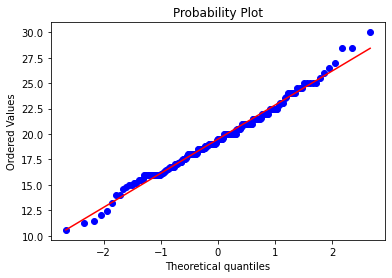

In [8]:
_ = scipy.stats.probplot(data_wine['Alcalinity of ash'], plot=plt)

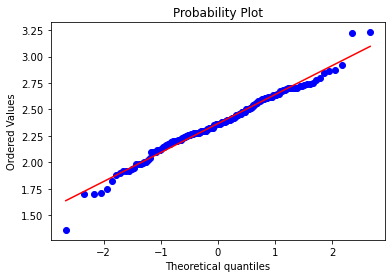

In [9]:
_ = scipy.stats.probplot(data_wine['Ash'], plot=plt)

В целом видно, что данные лежат на прямой, поэтому можно пробовать использовать критерии нормальности.

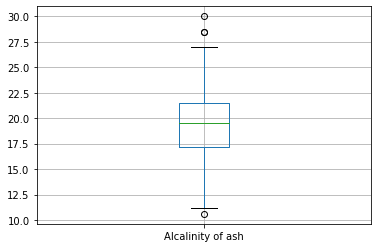

In [10]:
data_wine.boxplot(column=['Alcalinity of ash'])

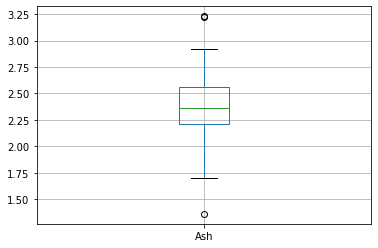

In [11]:
data_wine.boxplot(column=['Ash'])

В каждом из столбцов наблюдаются по 3 значения, которые выбиваются из нормы. Посмотрим на них в столбце `Ash`

In [12]:
np.sort(data_wine['Ash'])[:5], np.sort(data_wine['Ash'])[-5:]

(array([1.36, 1.7 , 1.7 , 1.71, 1.75]), array([2.86, 2.87, 2.92, 3.22, 3.23]))

Видно, что сильно выбиваются из графика значения 1.36, 3.22, 3.23. Их надо будет анализировать отдельно, чтобы понять, какова природа этих явлений!

In [13]:
filtered_ash = data_wine[(data_wine['Ash'] > 1.36) & (data_wine['Ash'] < 3.22)]['Ash']

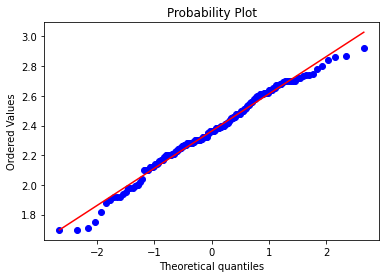

In [14]:
_ = scipy.stats.probplot(filtered_ash, plot=plt)

### 1. Критерий Колмогорова-Смирнова

Для работы с критерием Колмогорова-Смирнова необходимо задать выборку и функцию распределения, которую желаем проверить.

Алгоритм:
1. Ищем распределение из scipy.stats, задаем параметры распеределения (`scipy.stats.norm(params)`)
2. Вызываем функцию cdf: `scipy.stats.norm(loc=5, scale=2).cdf` (так мы получаем распределение $\mathcal{N}(5, 4)$)

Каким образом искать параметры:
1. Перебором по сетке параметров (grid search)
2. Использовать функцию `fit` у распределения, получаем `params`, затем: `scipy.stats.<your-distribution>(*params)`.
3. Комбинация этих методов: сначала 2 как начальное приближение, а потом перебор по малой сетке.

Воспользуемся параметром 2.

In [15]:
fitted_params = scipy.stats.norm.fit(filtered_ash)

In [16]:
fitted_params

(2.3624571428571426, 0.24878956602571847)

In [17]:
scipy.stats.kstest(filtered_ash, scipy.stats.norm(*fitted_params).cdf)

KstestResult(statistic=0.047301989464652805, pvalue=0.8284694540336397)

Видим, что `p-value` намного больше уровня значимости 0.05, поэтому на уровне значимости 0.05 гипотезу о нормальности распределения нельзя опровергнуть.

### 2. Критерий Андерсона-Дарлинга

Проверим тест Андерсона-Дарлинга.

In [18]:
scipy.stats.anderson(filtered_ash, dist='norm')

AndersonResult(statistic=0.5553269456547127, critical_values=array([0.564, 0.642, 0.77 , 0.898, 1.068]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Эта функция возвращает другие параметры: критические значения, при превышении которых гипотеза опровергается.

Как видим, даже на уровне значимости гипотеза не опровергается.

### 3. Критерий Шапиро-Уилка

Проверим тест Шапиро-Уилка. Этот тест мощнее, чем предыдущие, и, поэтому, улавливает меньшие отклонения.

In [19]:
scipy.stats.shapiro(filtered_ash)

(0.9863818883895874, 0.08768902719020844)

На уровне значимости 0.05 гипотеза о нормальности опровергнуть нельзя, а вот на уровне значимости 0.1 - уже можно.

In [20]:
scipy.stats.jarque_bera(filtered_ash)

(2.3557587073788473, 0.3079310595510072)

### 4. Критерий хи-квадрат

Если никаких данных о нормальности нет, то можно применить критерий хи-квадрат.

Покажем, как критерий хи-квадрат можно применять для непрерывных распределений.

Разобьем отрезок $[0, 1]$ на 6 участков равной длины. 

In [21]:
fitted_params

(2.3624571428571426, 0.24878956602571847)

In [22]:
ash_distribution = scipy.stats.norm(*fitted_params)

In [23]:
GRID = np.linspace(0, 1, 7)

In [24]:
quantiles = ash_distribution.ppf(GRID)

In [25]:
quantiles

array([      -inf, 2.12177275, 2.25529668, 2.36245714, 2.4696176 ,
       2.60314153,        inf])

In [26]:
bins = [
    filtered_ash[
        (filtered_ash > left) & (filtered_ash < right)
    ] for left, right in zip(quantiles[:-1], quantiles[1:])
]

In [27]:
bin_sizes = np.array([len(bin_) for bin_ in bins])
frequencies = bin_sizes / len(filtered_ash)

In [28]:
frequencies

array([0.15428571, 0.14285714, 0.22285714, 0.14285714, 0.13714286,
       0.2       ])

In [29]:
scipy.stats.chisquare(f_obs=frequencies, f_exp=np.ones(6) / 6)

Power_divergenceResult(statistic=0.03856326530612247, pvalue=0.999984678347574)

Как видим, несмотря на то, что данные раскиданы по бинам неравномерно, получили все равно хороший результат.

Объединим проделанный пункт с тестом хи-квадрат в одну функцию:

In [30]:
def check_chi_square(distribution, sample, num_bins):
    GRID = np.linspace(0, 1, num_bins + 1)
    quantiles = distribution.ppf(GRID)
    
    bins = [
        sample[
            (sample > left) & (sample < right)
        ] for left, right in zip(quantiles[:-1], quantiles[1:])
    ]
    
    bin_sizes = np.array([len(bin_) for bin_ in bins])
    frequencies = bin_sizes / len(sample)

    return scipy.stats.chisquare(f_obs=frequencies, f_exp=np.ones(num_bins) / num_bins)

In [31]:
check_chi_square(ash_distribution, filtered_ash, 6)

Power_divergenceResult(statistic=0.03856326530612247, pvalue=0.999984678347574)

Сдвинем распределение и попробуем запустить тест:

In [32]:
fitted_params

(2.3624571428571426, 0.24878956602571847)

In [33]:
check_chi_square(scipy.stats.norm(2, 5), filtered_ash, 8)

Power_divergenceResult(statistic=5.52865306122449, pvalue=0.5957300558221952)

Почему результат не сильно изменился?

## Реальный пример

Датасет Ame Housing Price Data - указаны цены на гараж, качество жилья и прочие параметры. Необходимо оценить стоимость дома.

In [34]:
data_homes = pd.read_csv('./Data/train_normal.csv', index_col='Id')

FileNotFoundError: ignored

In [ ]:
data_homes.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
data_homes.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


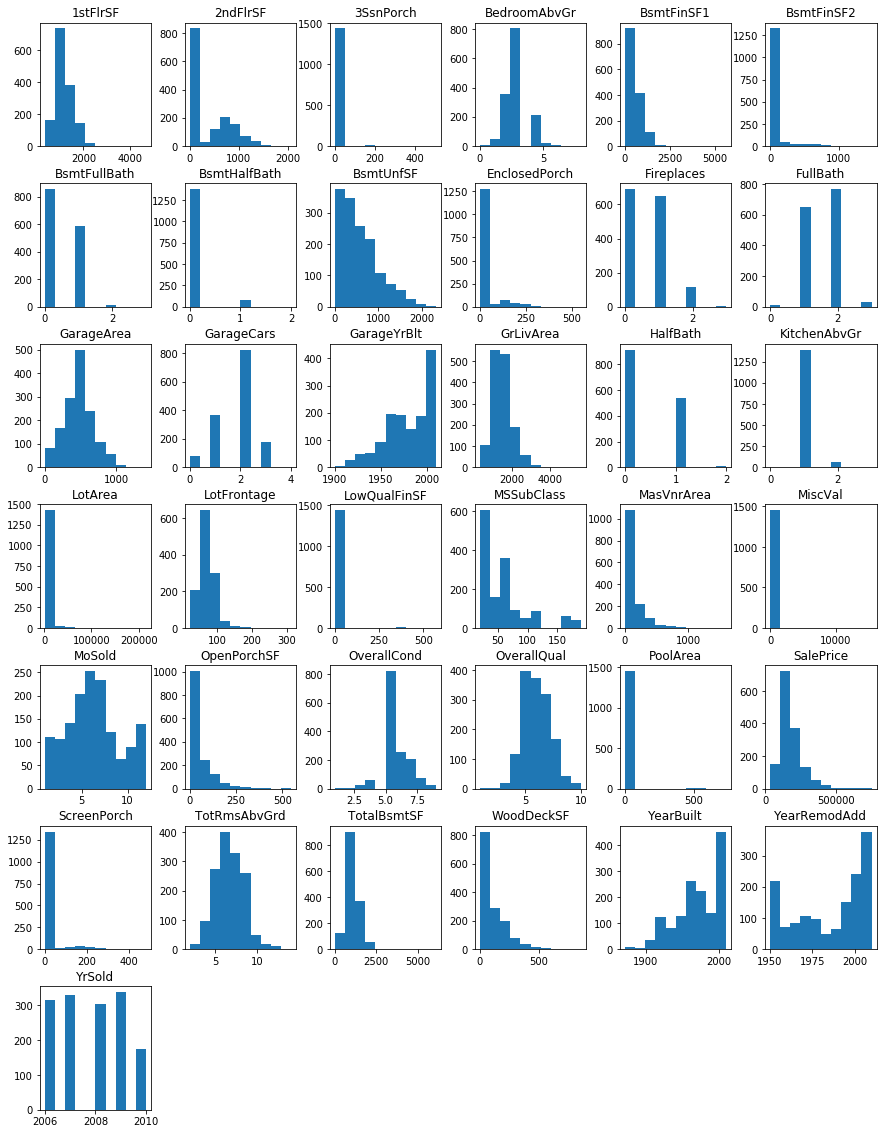

In [ ]:
_ = data_homes.hist(grid=False, figsize=(15, 20))

Посмотрим на данные 'TotRmsAbvGrd' - Total square feet of basement area.

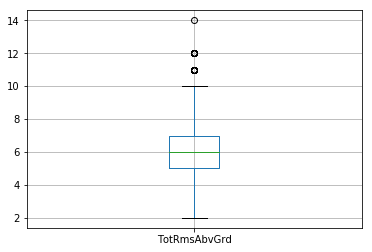

In [ ]:
data_homes.boxplot(column='TotRmsAbvGrd')

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]), array([ 2,  3,  3, ..., 12, 12, 14])),
 (1.5801999254431995, 6.517808219178082, 0.970590728322417))

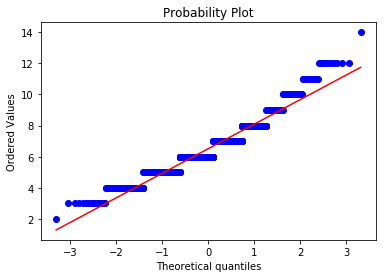

In [ ]:
scipy.stats.probplot(data_homes['TotRmsAbvGrd'], plot=plt)

Распределение оказалось равномерным, но немного смещенным от нормального.

((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([0.69314718, 1.09861229, 1.09861229, ..., 2.48490665, 2.48490665,
         2.63905733])),
 (0.24494687953654426, 1.843788587025699, 0.9790946411333169))

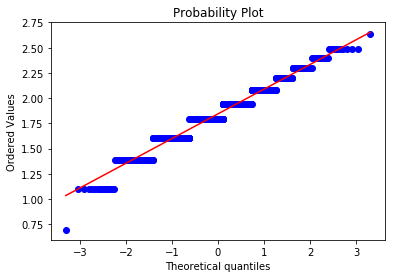

In [ ]:
scipy.stats.probplot(np.log(data_homes['TotRmsAbvGrd']), plot=plt)

Распределение кажется дискретным, похожим на логнормальное! Поэтому проверим его критерием хи-квадрат!

In [ ]:
loc, scale = np.mean(np.log(data_homes['TotRmsAbvGrd'])), np.std(np.log(data_homes['TotRmsAbvGrd']), ddof=1)

In [ ]:
check_chi_square(scipy.stats.norm(loc, scale), np.log(data_homes['TotRmsAbvGrd']), 6)

Power_divergenceResult(statistic=0.17311315443798084, pvalue=0.9993764125812067)

Отлично подходит!

#### Столбец 2ndFlrSF: Second floor square feet

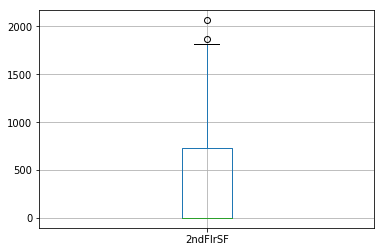

In [ ]:
data_homes.boxplot(column='2ndFlrSF')

In [ ]:
np.sort(data_homes['2ndFlrSF'])[:20], np.sort(data_homes['2ndFlrSF'])[-20:]

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1360, 1362, 1370, 1392, 1414, 1426, 1427, 1440, 1479, 1518, 1519,
        1523, 1538, 1540, 1589, 1611, 1796, 1818, 1872, 2065]))

Очень много нулевых значений - отфильтруем их!

In [ ]:
filtered_second_floor = data_homes[
    (data_homes['2ndFlrSF'] > 100) & (data_homes['2ndFlrSF'] < 1700)
]['2ndFlrSF']

In [ ]:
np.sort(filtered_second_floor)[:10]

array([110, 167, 192, 208, 213, 220, 224, 240, 240, 252])

In [ ]:
np.max(filtered_second_floor)

1611

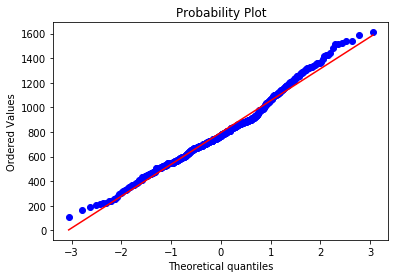

In [ ]:
_ = scipy.stats.probplot(filtered_second_floor, plot=plt)

После выкидывания пяти максимальных значений (надо обязательно рассмотреть эти случаи), получаем почти прямую.

In [ ]:
fitted_2nd_params = scipy.stats.norm.fit(filtered_second_floor)

In [ ]:
fitted_2nd_params

(795.945773524721, 259.7073072070675)

In [ ]:
scipy.stats.kstest(filtered_second_floor, scipy.stats.norm(*fitted_2nd_params).cdf)

KstestResult(statistic=0.07233479257298225, pvalue=0.0026803782663749054)

In [ ]:
scipy.stats.anderson(np.log(filtered_second_floor), 'norm')

AndersonResult(statistic=4.594953229222483, critical_values=array([0.572, 0.652, 0.782, 0.912, 1.085]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

Однако это распределение не оказалось нормальным - хвосты немного смещены.

In [ ]:
filtered_second_floor.skew()

0.42294737062455395

Попробуем распределение Стьюдента:

In [ ]:
fitted_t_params = scipy.stats.t.fit(filtered_second_floor)
fitted_t_params

(15.2969817132511, 789.6688301692409, 242.5759296651826)

In [ ]:
scipy.stats.kstest(filtered_second_floor, scipy.stats.t(*fitted_t_params).cdf)

KstestResult(statistic=0.05568388677072689, pvalue=0.039416141668695115)

Попробуем логарифм:

In [ ]:
fitted_t_log_params = scipy.stats.t.fit(np.log(filtered_second_floor))
fitted_t_log_params

(5.200376592748972, 6.645549953746327, 0.28395920220871795)

In [ ]:
scipy.stats.kstest(np.log(filtered_second_floor), scipy.stats.t(*fitted_t_log_params).cdf)

KstestResult(statistic=0.03160146543051401, pvalue=0.5598607051254842)

О! То, что надо!

Логарифм распределения при условии того, что значение больше 0 - похоже на распределение Стьюдента!

Упражнение.
Проверить распределение роста хоккеистов на нормальность с помощью критерия Колмогорова-Смирнова, Пирсона, построить графики.


In [ ]:
df = pd.read_csv(r'D:\hockey_players.csv', encoding='cp1251', parse_dates=['birth'])
df = df.drop_duplicates(['name', 'birth'])
df.head()

In [ ]:
Визуализируем модуль разности между эмпирической и теоретической функциями распределения.

In [ ]:
cdf = stats.norm(loc=a, scale=sigma).cdf 

NameError: name 'stats' is not defined

In [ ]:
ox = np.linspace(150, 220, 10000)
oy = np.array([np.abs(edf(x) - cdf(x)) for x in ox])

plt.figure(figsize=(15, 5))
plt.plot(ox, oy)

Максимум разницы приходится на середину. Это же можно наблюдать по гистограмме, которая в районе середины сильнее всего расходится с тем, что можно было бы ожидать от нормального распределения:

In [ ]:
df['height'].hist(bins=15)

<b>Вывод!</b> Эвристики помогают получить необходимый результат!

Список возможных эвристик:

1. $x \rightarrow x^2$
2. $x \rightarrow \ln x$
3. $x \rightarrow \ln (1 + x)$
4. $x \rightarrow e^{-x}$
5. И так далее

### Что умеем?

1. Как подбирать распределение, которое может подходить под данные.
2. Находить выбросы - максимальные, минимальные значения, которые не подходят под распределение.
3. Использовать эвристики, которые "причесывают" данные.
4. Использовать различные способы проверки принадлежности распределению:
    1. ks-test
    2. Хи-квадрат
    3. Критерий Андерсона-Дарлинга (нормальное, экспоненциальные распределения)
    4. Критерий Шапиро-Уилка (нормальное распределение)

## Полезные ссылки

1. http://www.jaqm.ro/issues/volume-6,issue-3/pdfs/1_engmann_cousineau.pdf - сравнение критериев Колмогорова-Смирнова и Андерсона-Дарлинга
2. https://ww2.amstat.org/publications/jse/v19n3/decock.pdf - датасет Ame Housing Price Data
3. https://www.kaggle.com/c/house-prices-advanced-regression-techniques - датасет, используемый в ноутбуке для проверки критериев